In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

import warnings


import math
from scipy import stats

In [3]:
data=pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
year=[]
month=[]
for i in range(data.shape[0]):
    year.append(int(data['date'][i][:4]))
    month.append(int(data['date'][i][4:6]))
    
data['year']=year
data['month']=month
data.head()
    

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [44]:
data['price_sqft_liv']=data['price']/data['sqft_living']
data['age']=data['year']-data['yr_built']
data['prod_year']=data['year']*data['yr_built']

In [8]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,6.574423
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,3.115308
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000,4.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,6.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<AxesSubplot:>

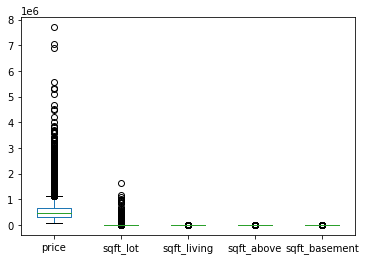

In [10]:
data[['price','sqft_lot','sqft_living','sqft_above','sqft_basement']].plot.box()

(0.0, 1.0)

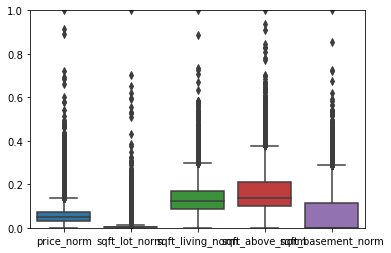

In [37]:

data['price_norm']=(data['price']-data['price'].min())/(data['price'].max()-data['price'].min())
data['sqft_living_norm']=(data['sqft_living']-data['sqft_living'].min())/(data['sqft_living'].max()-data['sqft_living'].min())
data['sqft_lot_norm']=(data['sqft_lot']-data['sqft_lot'].min())/(data['sqft_lot'].max()-data['sqft_lot'].min())
data['sqft_above_norm']=(data['sqft_above']-data['sqft_above'].min())/(data['sqft_above'].max()-data['sqft_above'].min())
data['sqft_basement_norm']=(data['sqft_basement']-data['sqft_basement'].min())/(data['sqft_basement'].max()-data['sqft_basement'].min())

data['price_std']=(data['price']-data['price'].mean())/data['price'].std()
data['sqft_living_std']=(data['sqft_living']-data['sqft_living'].mean())/data['sqft_living'].std()
data['sqft_lot_std']=(data['sqft_lot']-data['sqft_lot'].mean())/data['sqft_lot'].std()
data['sqft_above_std']=(data['sqft_above']-data['sqft_above'].mean())/data['sqft_above'].std()
data['sqft_basement_std']=(data['sqft_basement']-data['sqft_basement'].mean())/data['sqft_basement'].std()


#fig2, ax2 = plt.subplots()
#plt.ylim(0, 0.6)
#ax2.boxplot(data[['price_norm','sqft_lot_norm','sqft_living_norm','sqft_above_norm','sqft_basement_norm']])

ax=sns.boxplot(data=data[['price_norm','sqft_lot_norm','sqft_living_norm','sqft_above_norm','sqft_basement_norm']])
ax.set_ylim(0,1)


(-1.0, 1.0)

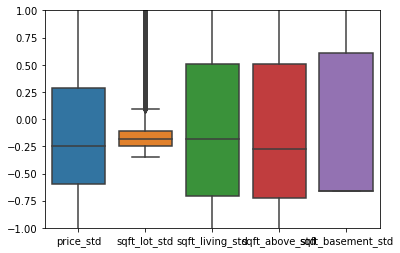

In [38]:
ax=sns.boxplot(data=data[['price_std','sqft_lot_std','sqft_living_std','sqft_above_std','sqft_basement_std']])
ax.set_ylim(-1,1)

In [13]:
z_scores=np.abs(stats.zscore(data['price']))
data['z_scores']=z_scores
data_clean=data[data['z_scores']<2]
data_clean.reset_index(inplace=True, drop=False)

<AxesSubplot:>

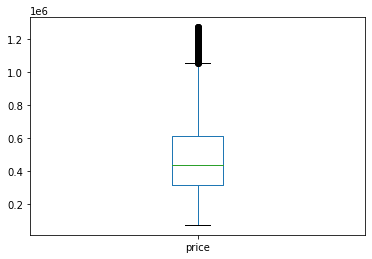

In [14]:
data_clean[['price']].plot.box()

In [64]:
#z_scores=np.abs(stats.zscore(data_clean['sqft_living']))
#data_clean['z_scores']=z_scores
#data_clean=data_clean[data_clean['z_scores']<2]
#data_clean.reset_index(inplace=True, drop=False)

In [15]:
data_clean.describe()

,index,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living_norm,sqft_lot_norm,sqft_above_norm,sqft_basement_norm,price_std,sqft_living_std,sqft_lot_std,sqft_above_std,sqft_basement_std,z_scores
count,20770.000000,2.077000e+04,2.077000e+04,20770.000000,20770.000000,20770.000000,2.077000e+04,20770.000000,20770.000000,20770.000000,...,20770.000000,20770.000000,20770.000000,20770.000000,20770.000000,20770.000000,20770.000000,20770.000000,20770.000000,20770.000000
mean,10781.491574,4.595936e+09,4.875290e+05,3.339191,2.064444,1997.527251,1.469091e+04,1.480597,0.003467,0.185219,...,0.128870,0.008584,0.157376,0.056485,-0.143163,-0.089687,-0.010045,-0.076223,-0.043502,0.519935
std,6232.423252,2.877030e+09,2.243203e+05,0.916080,0.719869,798.643027,4.005190e+04,0.537316,0.058777,0.667886,...,0.060275,0.024262,0.081629,0.086114,0.611015,0.869564,0.966958,0.898999,0.937848,0.351439
min,0.000000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.266831,-1.948846,-0.352168,-1.809452,-0.658666,0.000240
25%,5383.250000,2.126059e+09,3.168125e+05,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,0.000000,0.000000,...,0.083774,0.002714,0.097588,0.000000,-0.608170,-0.740276,-0.244009,-0.734691,-0.658666,0.245392
50%,10761.500000,3.905035e+09,4.400000e+05,3.000000,2.250000,1870.000000,7.520000e+03,1.000000,0.000000,0.000000,...,0.119245,0.004240,0.135965,0.000000,-0.272625,-0.228539,-0.183169,-0.312032,-0.658666,0.490545
75%,16171.750000,7.335201e+09,6.130000e+05,4.000000,2.500000,2460.000000,1.040000e+04,2.000000,0.000000,0.000000,...,0.163774,0.005985,0.201754,0.109959,0.198601,0.413854,-0.113639,0.412526,0.538871,0.735697
max,21612.000000,9.900000e+09,1.272500e+06,33.000000,7.500000,7480.000000,1.651359e+06,3.500000,1.000000,4.000000,...,0.542642,1.000000,0.770833,0.564315,1.994981,5.879638,39.503424,6.679954,5.487185,1.995027


<AxesSubplot:>

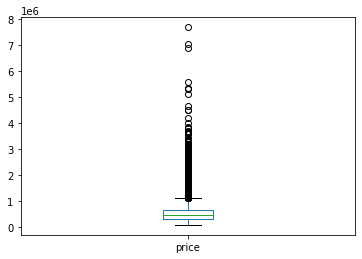

In [16]:
data[['price']].plot.box()

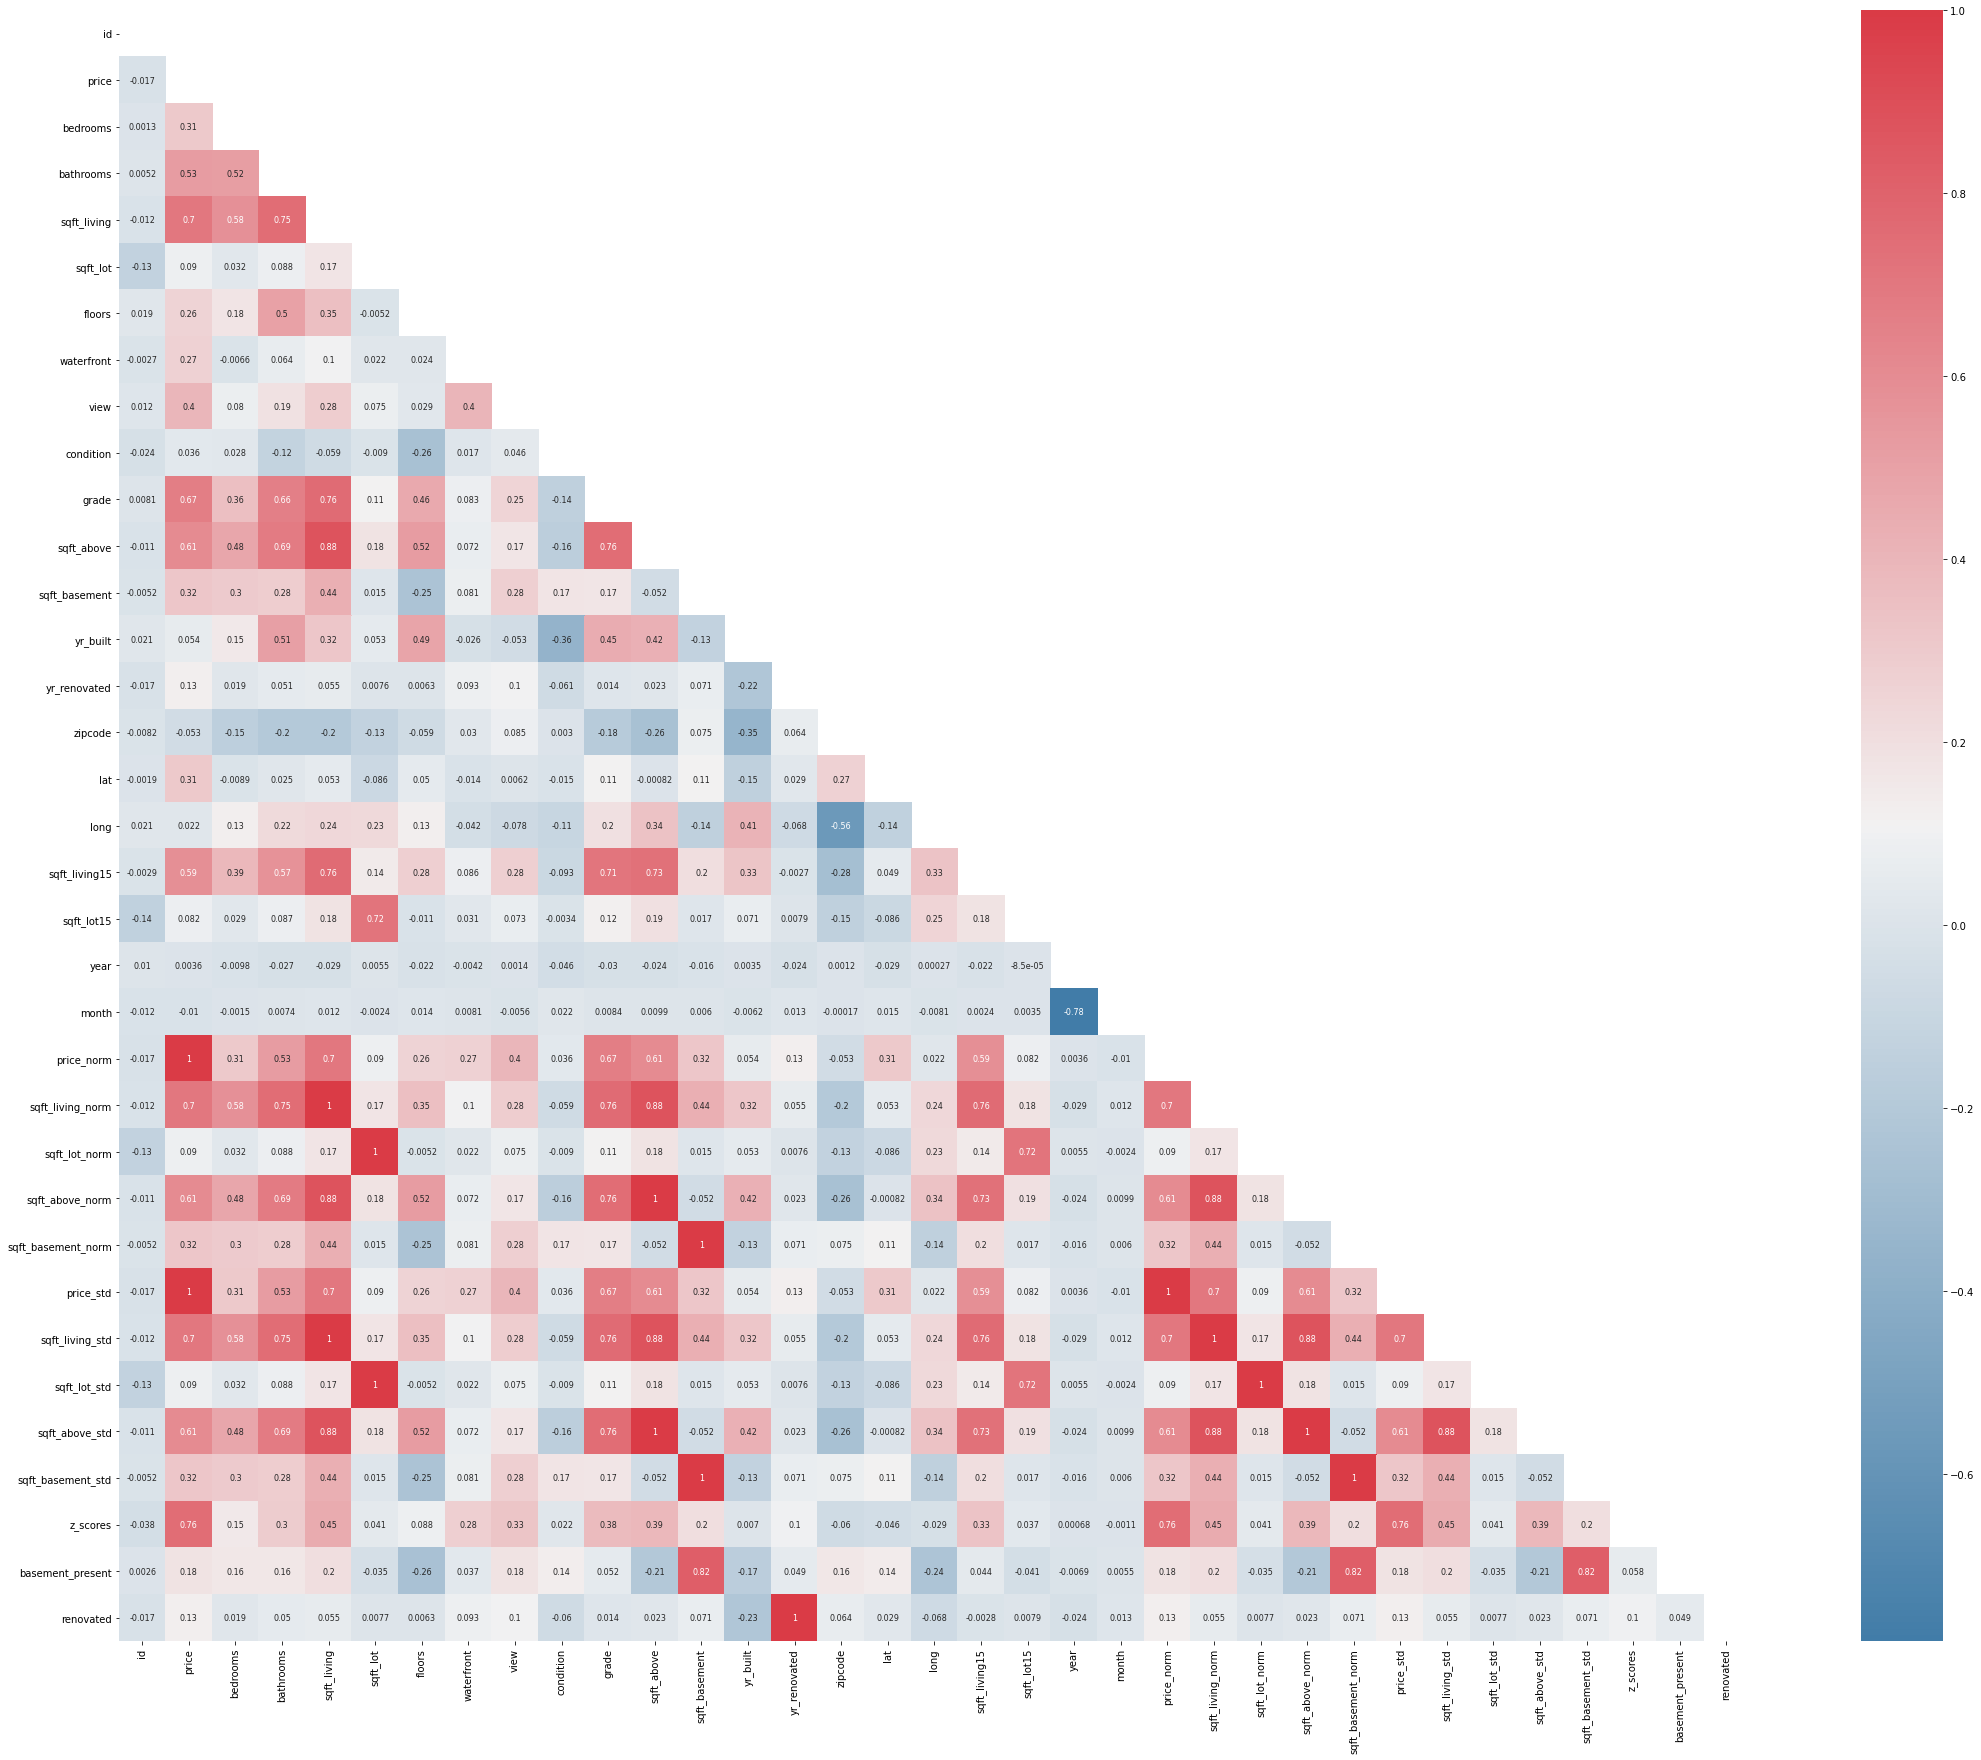

In [39]:
def plot_correlation_map( df ):
    corr = df.corr()
    mask=np.zeros_like(corr)
    mask[np.triu_indices_from(mask)]=True
    s , ax = plt.subplots( figsize =( 40 , 30 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    s = sns.heatmap(corr,cmap = cmap,square=True,cbar_kws={ 'shrink' : 1 },
        ax=ax,annot = True,annot_kws = { 'fontsize' : 8},mask=mask)

plot_correlation_map(data)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packag

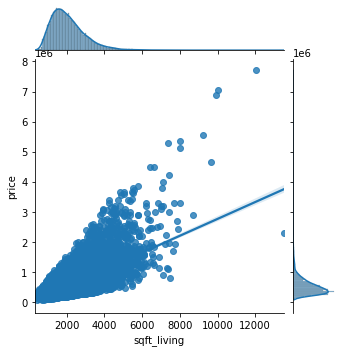

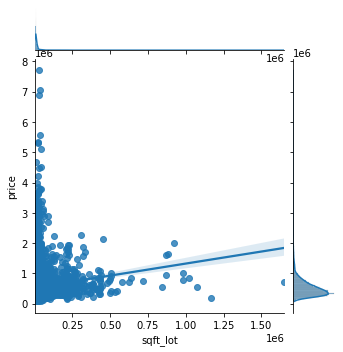

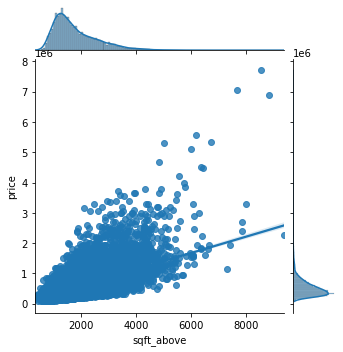

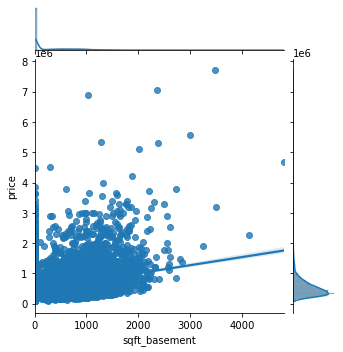

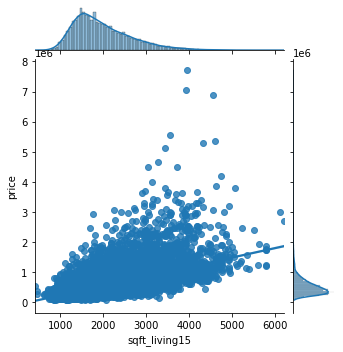

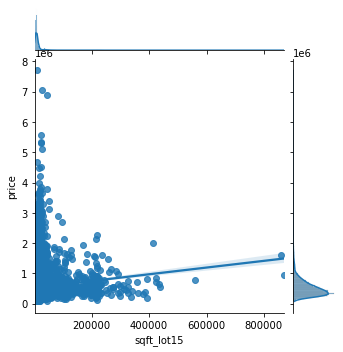

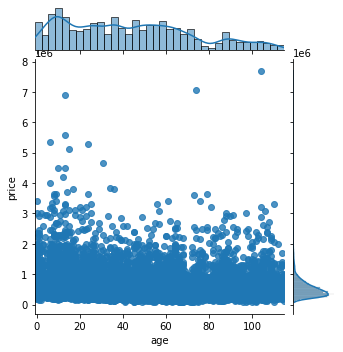

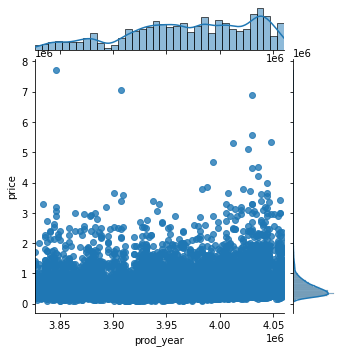

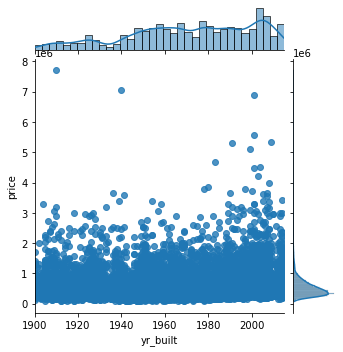

In [164]:
sns.jointplot(x="sqft_living", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="sqft_lot", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="sqft_above", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="sqft_basement", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="sqft_living15", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="sqft_lot15", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="age", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="prod_year", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="yr_built", y="price", data=data, kind = 'reg', size = 5)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


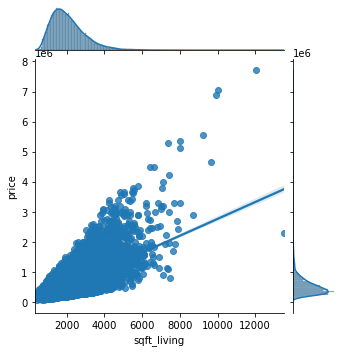

In [18]:
sns.jointplot(x="sqft_living", y="price", data=data, kind = 'reg', size = 5)

(0.0, 0.3)

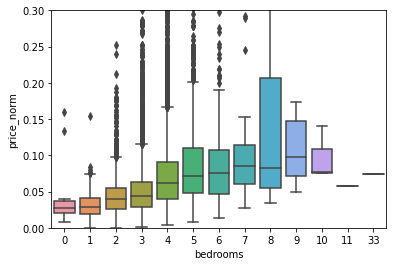

In [20]:
sns.boxplot(x='bedrooms',y='price_norm',data=data).set_ylim(0,0.3)


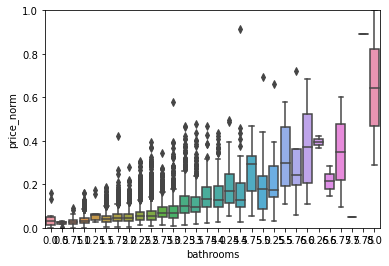

In [19]:
sns.boxplot(x='bathrooms',y='price_norm',data=data).set_ylim(0,1)
#sns.boxplot(x='waterfront',y='price',data=data_clean)
plt.show()

(0.0, 0.2)

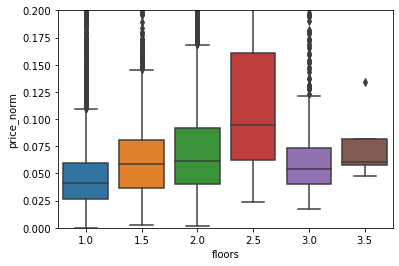

In [22]:
sns.boxplot(x='floors',y='price_norm',data=data).set_ylim(0,0.2)

(0.0, 0.3)

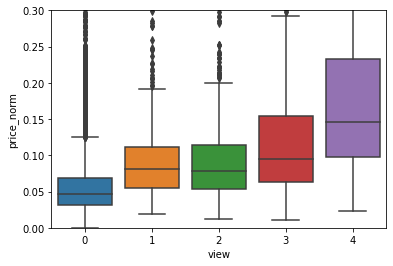

In [21]:
sns.boxplot(x='view',y='price_norm',data=data).set_ylim(0,0.3)

(0.0, 0.2)

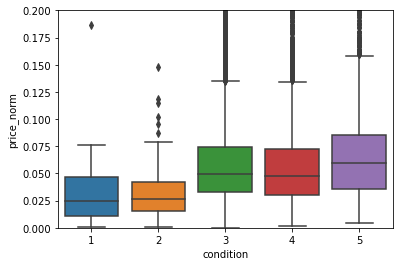

In [22]:
sns.boxplot(x='condition',y='price_norm',data=data).set_ylim(0,0.2)

In [23]:
data['basement_present'] = data['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
data['renovated'] = data['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

(0.0, 0.2)

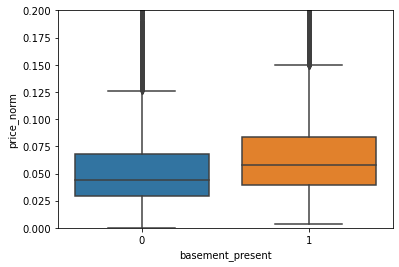

In [24]:
sns.boxplot(x='basement_present',y='price_norm',data=data).set_ylim(0,0.2)

(0.0, 0.2)

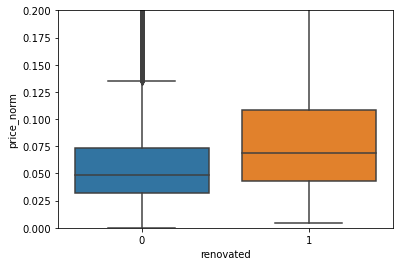

In [25]:
sns.boxplot(x='renovated',y='price_norm',data=data).set_ylim(0,0.2)

(0.0, 0.2)

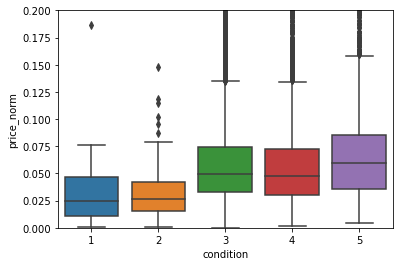

In [26]:
sns.boxplot(x='condition',y='price_norm',data=data).set_ylim(0,0.2)

(0.0, 0.6)

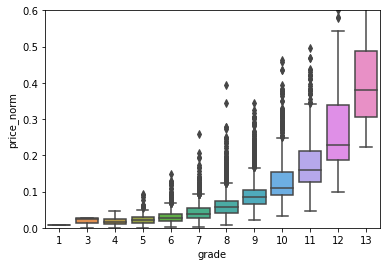

In [27]:
sns.boxplot(x='grade',y='price_norm',data=data).set_ylim(0,0.6)

(0.0, 0.6)

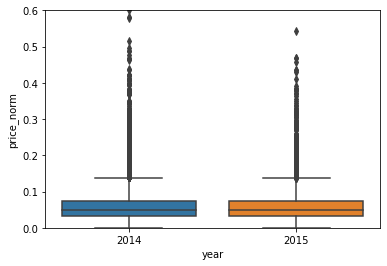

In [28]:
sns.boxplot(x='year',y='price_norm',data=data).set_ylim(0,0.6)

Text(0.5, 1.0, 'Features Correlating with Price')

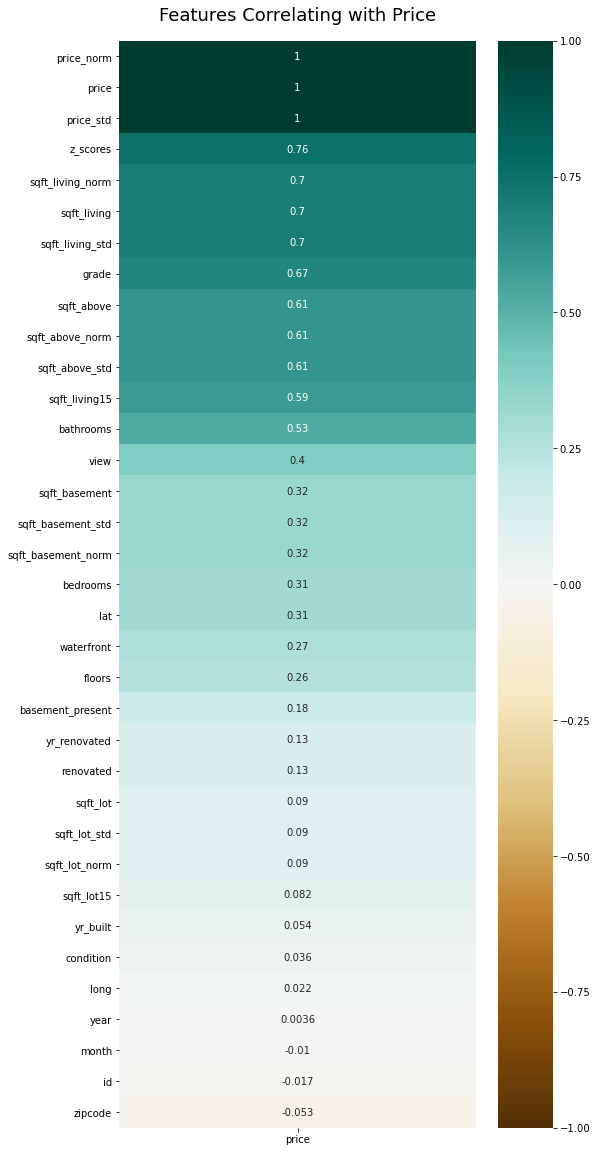

In [30]:
plt.figure(figsize=(8, 20))
heatmap = sns.heatmap(data.corr('pearson')[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Price', fontdict={'fontsize':18}, pad=20)

Text(0.5, 1.0, 'Features Correlating with Price per sqft')

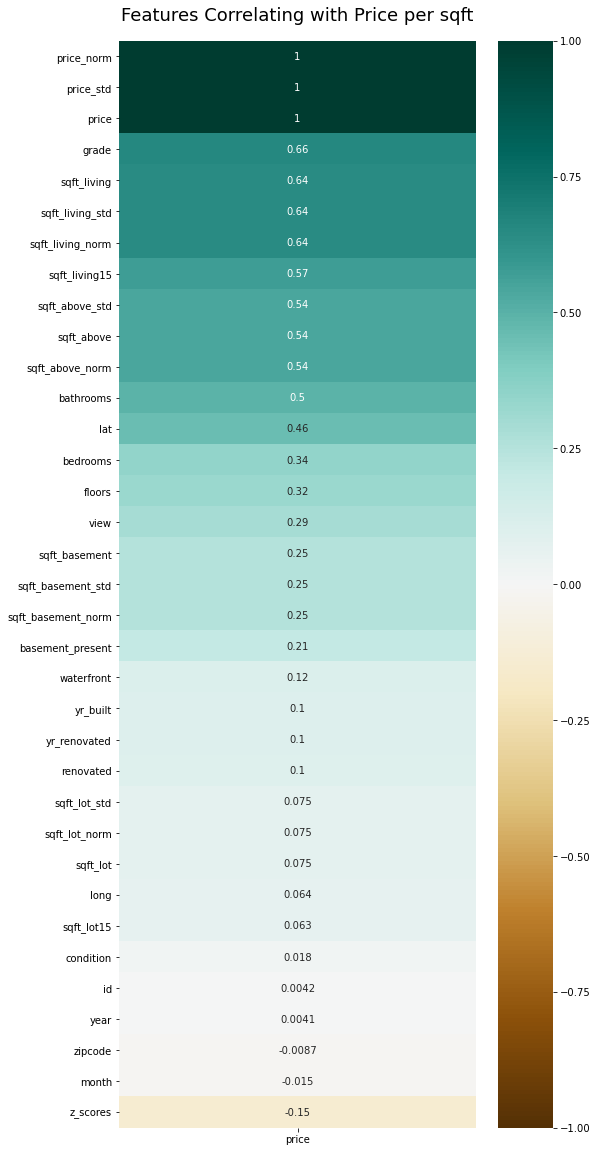

In [33]:
plt.figure(figsize=(8, 20))
heatmap = sns.heatmap(data.corr('spearman')[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Price per sqft', fontdict={'fontsize':18}, pad=20)

<AxesSubplot:xlabel='lat', ylabel='long'>

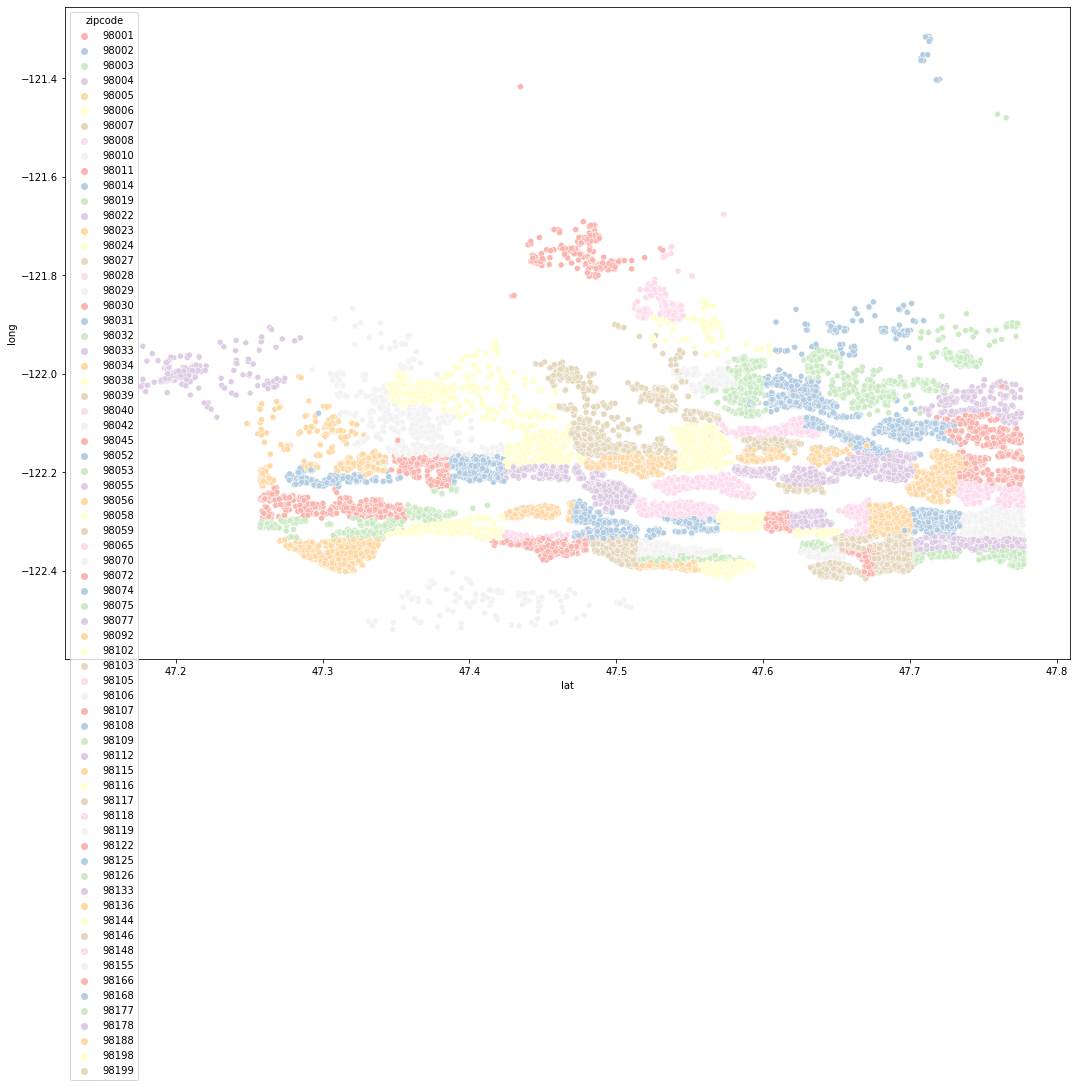

In [189]:
plt.figure(figsize=(18, 12))
sns.scatterplot(data=data, x='lat', y='long', hue='zipcode', palette='Pastel1')

<AxesSubplot:label='8537a141-35b3-4743-ada3-b3e1fdb19e21', xlabel='lat', ylabel='long'>

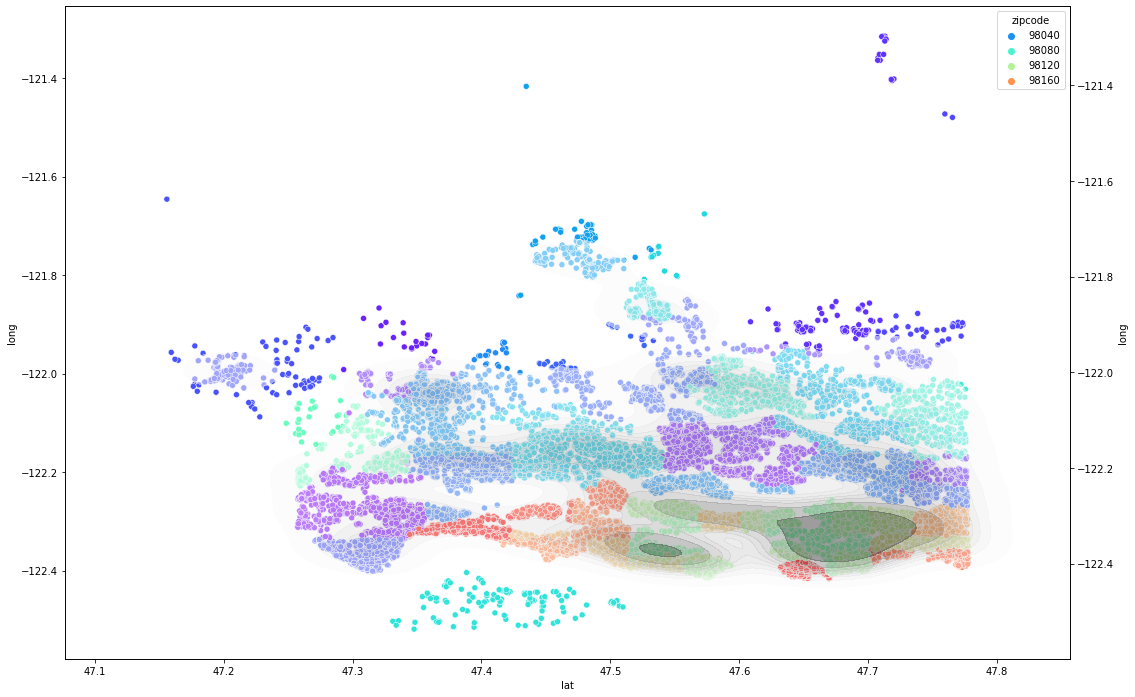

In [36]:
fig, ax = plt.subplots(figsize=(18, 12))
ax2 = ax.twinx()
sns.scatterplot(data=data, x='lat', y='long', hue='zipcode', palette='rainbow', ax=ax)
sns.kdeplot(data=data, x='lat', y='long', cmap='Greys', fill=True, alpha=.5, ax=ax2)


<AxesSubplot:xlabel='lat', ylabel='long'>

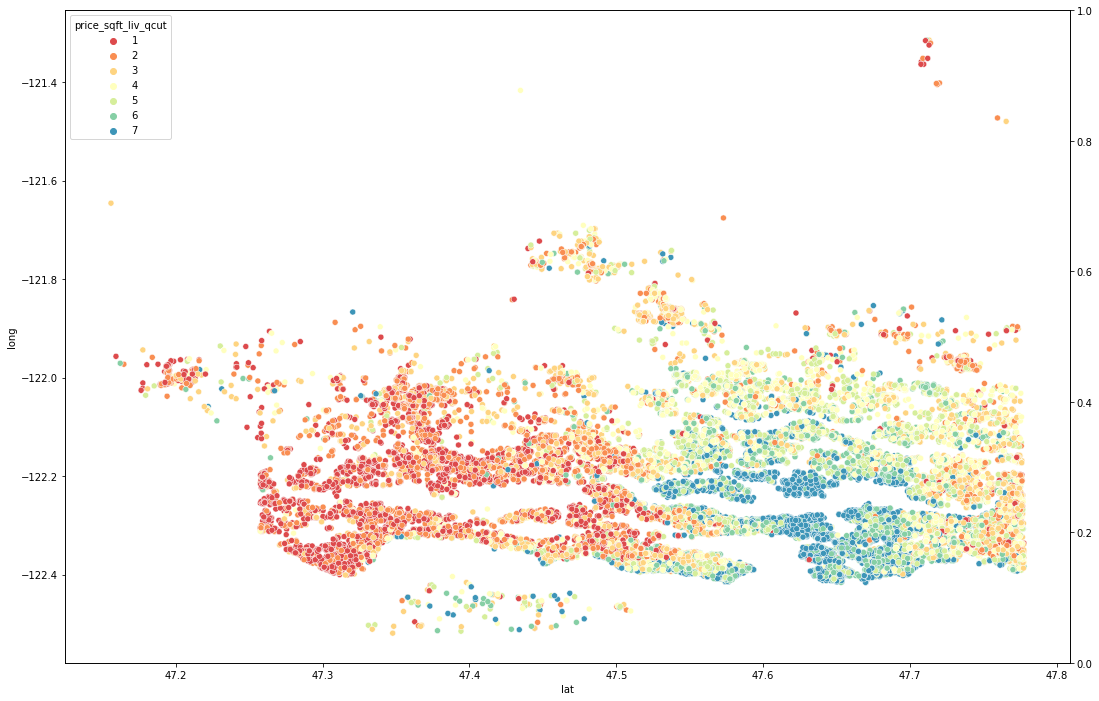

In [92]:
data['price_sqft_liv_qcut'] = pd.qcut(data['price_sqft_liv'], 7, labels=["1", "2", "3","4","5","6","7"])
fig, ax = plt.subplots(figsize=(18, 12))
ax2 = ax.twinx()
sns.scatterplot(data=data, x='lat', y='long', hue='price_sqft_liv_qcut', palette='Spectral', ax=ax)
#sns.kdeplot(data=data, x='lat', y='long', cmap='Greys', fill=True, alpha=.4, ax=ax2)


Text(0.5, 1.0, 'Features Correlating with Price per sqft')

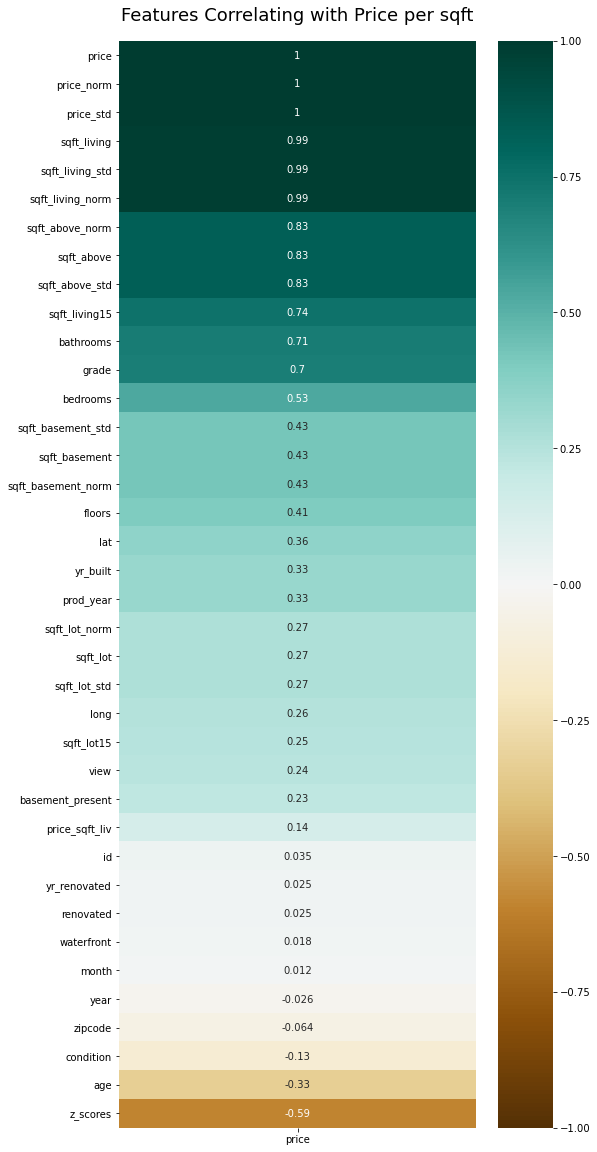

In [46]:
data_ext=data[data['price_sqft_liv_qcut']=="2"]
plt.figure(figsize=(8, 20))
heatmap = sns.heatmap(data_ext.corr('pearson')[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Price per sqft', fontdict={'fontsize':18}, pad=20)

In [212]:
data_ext=data[data['price_sqft_liv_qcut']=="5"]
x=data[["sqft_living","grade",'sqft_above','bathrooms','bedrooms','view','lat','long']]
y=data["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=16)

MSE 46895780169.25428
R squared 0.6532378842938447


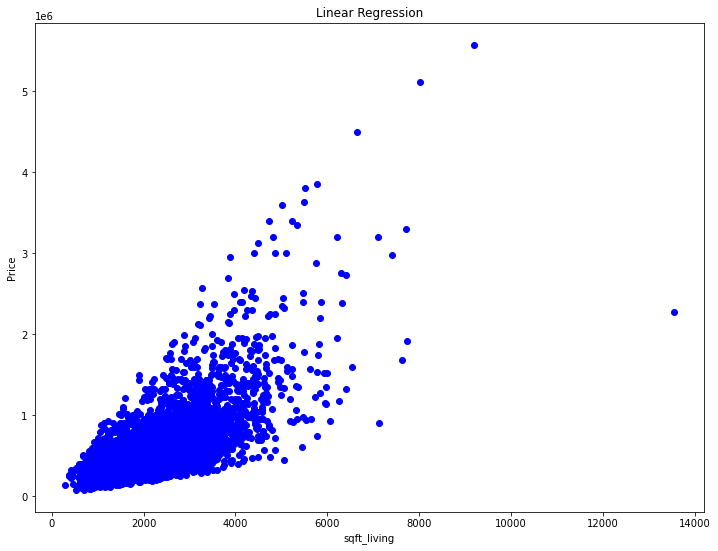

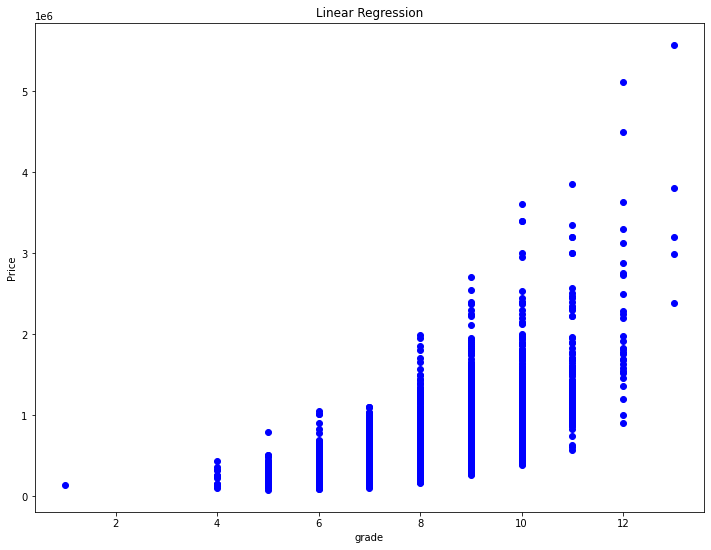

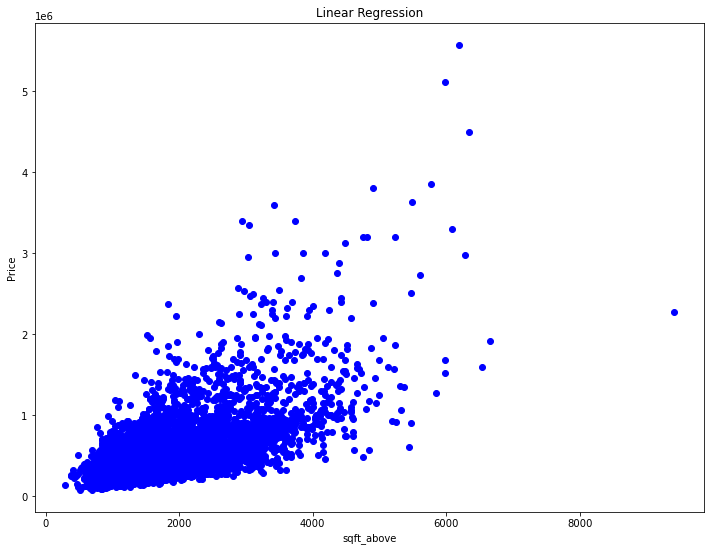

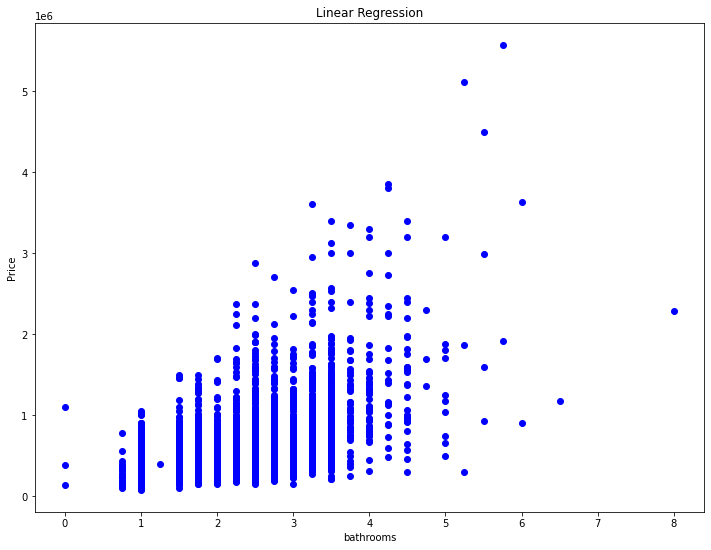

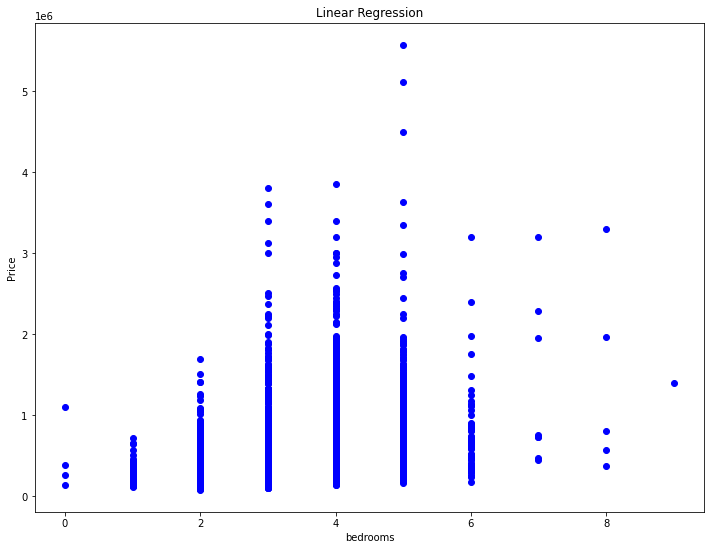

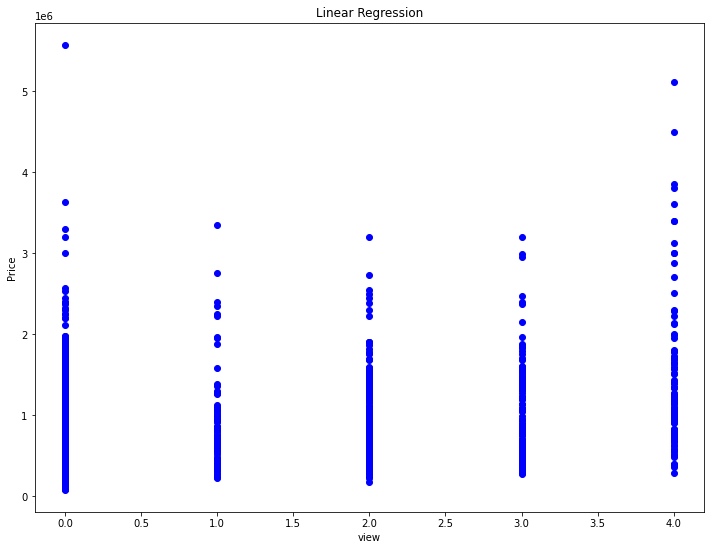

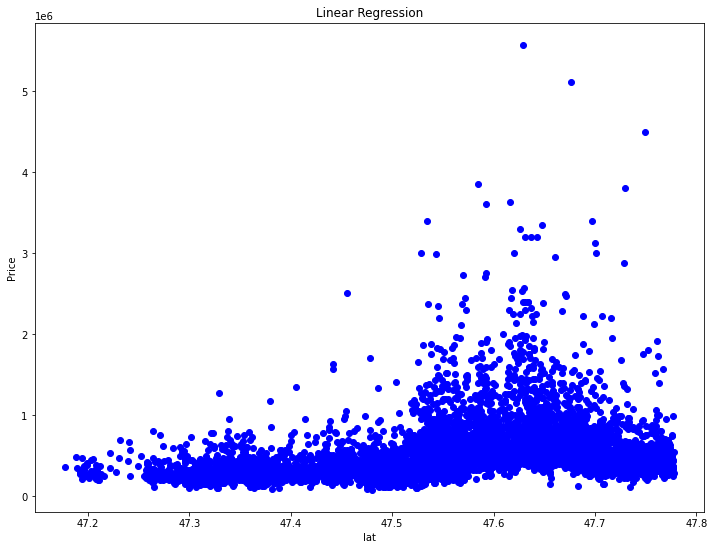

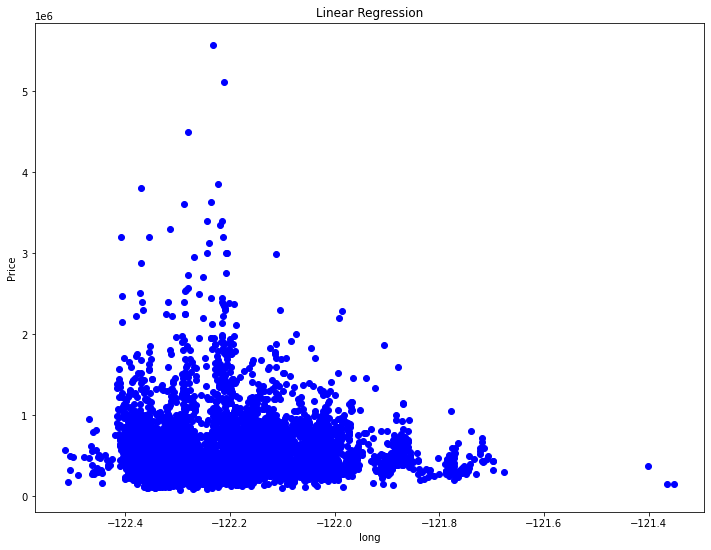

In [213]:
def linear_reg(feat):
    model=LinearRegression()
    model.fit(x_train[feat],y_train)
    predicted=model.predict(x_test[feat])
    
    print("MSE", mean_squared_error(y_test,predicted))
    print("R squared", metrics.r2_score(y_test,predicted))
    
    for i in range(len(feat)):
    
        plt.scatter(x_test[feat[i]],y_test,color='b')

        plt.title("Linear Regression")
        plt.ylabel("Price")
        plt.xlabel(feat[i])
        #plt.plot(x_test[feat],predicted,color="k")
        plt.show()
    
linear_reg(["sqft_living","grade",'sqft_above','bathrooms','bedrooms','view','lat','long'])

MSE 82198758466.27167
R squared 0.44860536044595356


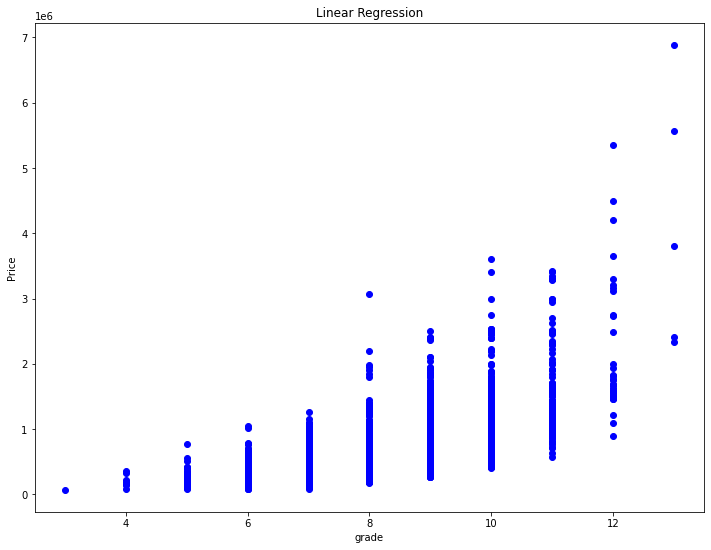

In [116]:
linear_reg(['grade'])

MSE 105996802642.59558
R squared 0.28896652604579953


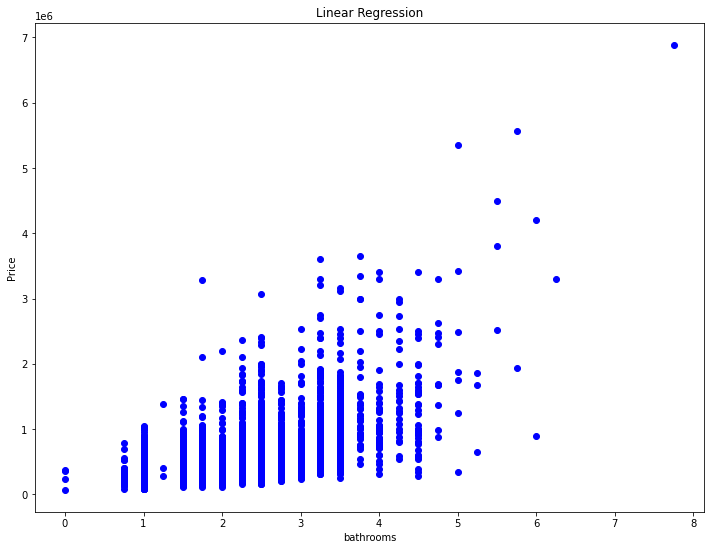

In [117]:
linear_reg(['bathrooms'])

MSE 128894725499.31079
R squared 0.1353657642375109


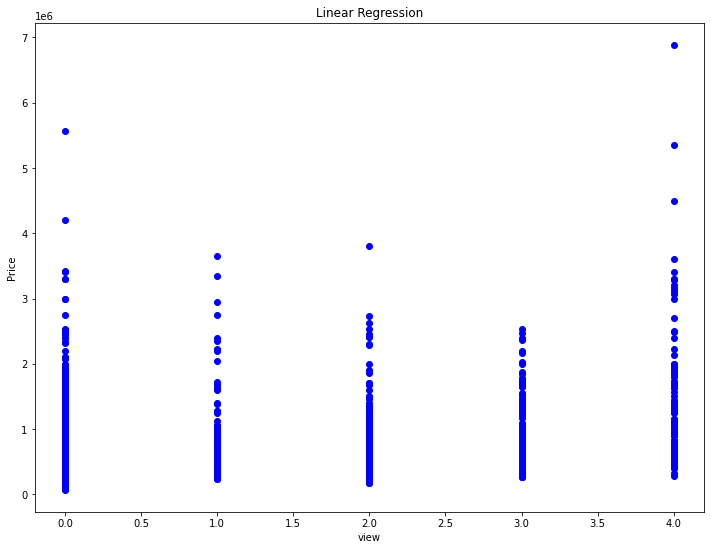

In [118]:
linear_reg(['view'])

MSE 93366271848.26721
R squared 0.3736929514159911


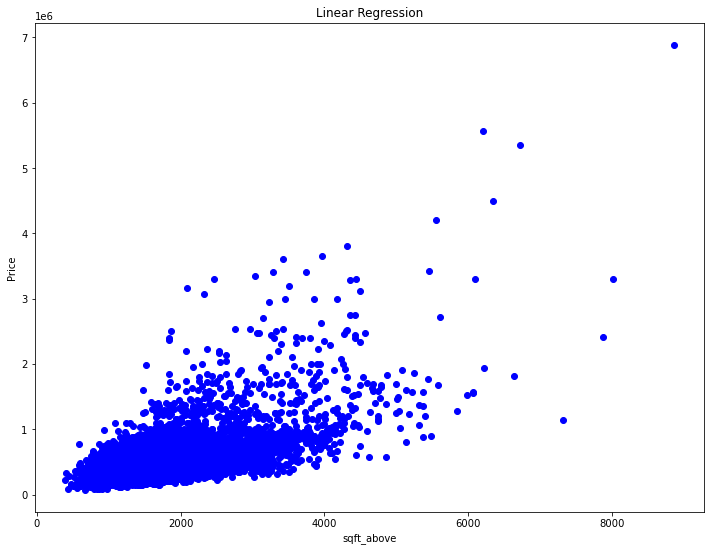

In [119]:
linear_reg(['sqft_above'])

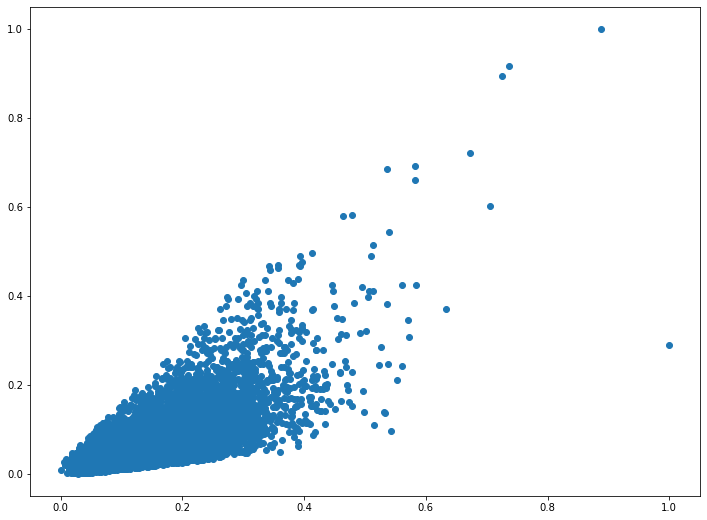

0.011607861277486465 0.05173527317397401


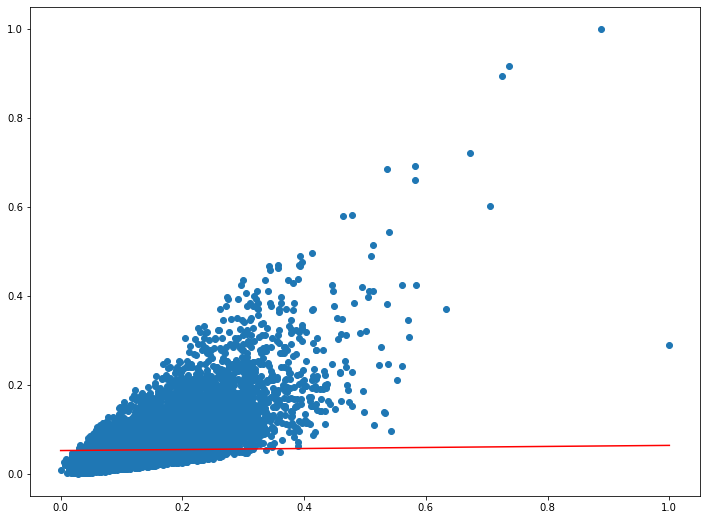

In [121]:
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data

X = data['sqft_living_norm']
Y = data["price_norm"]
plt.scatter(X, Y)
plt.show()

# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 10000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

In [137]:
#Multi Linear regression
model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 52658471414.07702
R squared 0.646763535038718


In [329]:
model.coef_

array([  286.40495185,  1908.9431984 ,    -6.53102998,   431.77204925,
       -1186.33659378,  -627.05793022])

In [330]:
poly = PolynomialFeatures(degree = 2)

In [331]:

x_train_fit = poly.fit_transform(x_train) #transforming our input data
model.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = model.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  700078948.3435607
R squared:  0.9875562870738346


In [185]:
def poly_reg(feat,deg):
    model=LinearRegression()
    poly = PolynomialFeatures(degree = deg)
    x_train_fit = poly.fit_transform(x_train[feat])
    model.fit( x_train_fit,y_train)
    x_test_ = poly.fit_transform(x_test[feat])                                       
    predicted=model.predict(x_test_)

    #print("MSE polynomial degree {0} regression of {1} :".format(deg,feat), mean_squared_error(y_test,predicted))
    print("R squared polynomial degree {0} regression of {1} :".format(deg,feat), metrics.r2_score(y_test,predicted))
    
    
    
poly_reg(["sqft_living","grade",'sqft_above','bathrooms','bedrooms','view','lat','long'],2)


R squared polynomial degree 2 regression of ['sqft_living', 'grade', 'sqft_above', 'bathrooms', 'bedrooms', 'view', 'lat', 'long'] : 0.7348911190997175


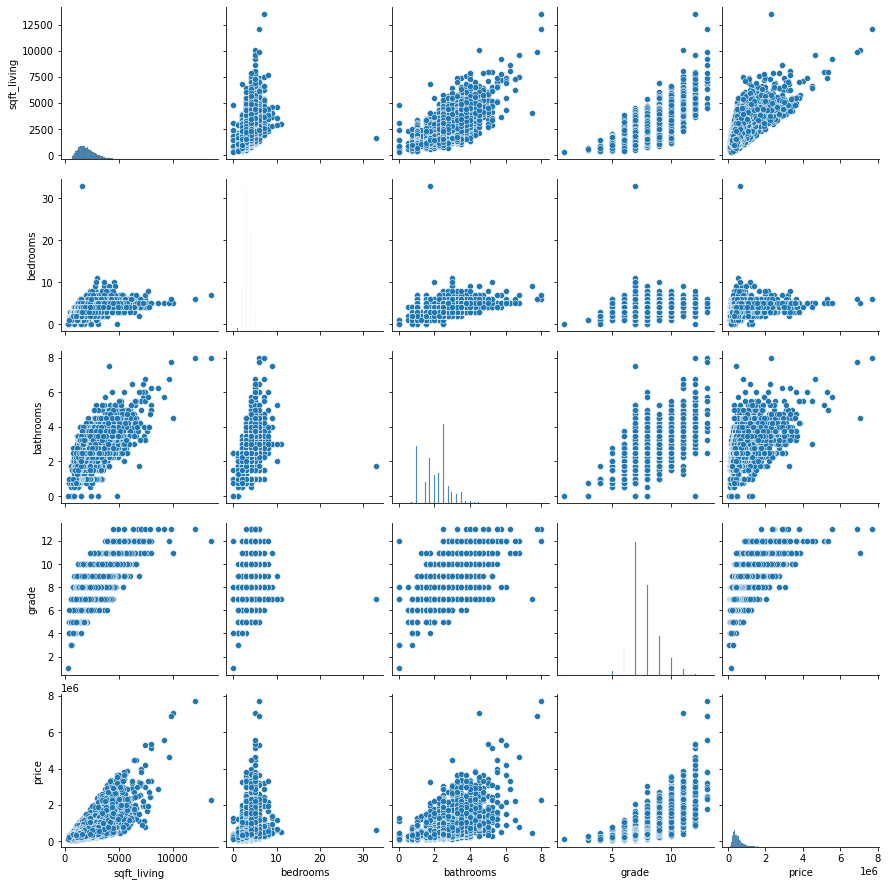

In [58]:
sns.pairplot(data[['sqft_living','bedrooms','bathrooms','grade','price']])

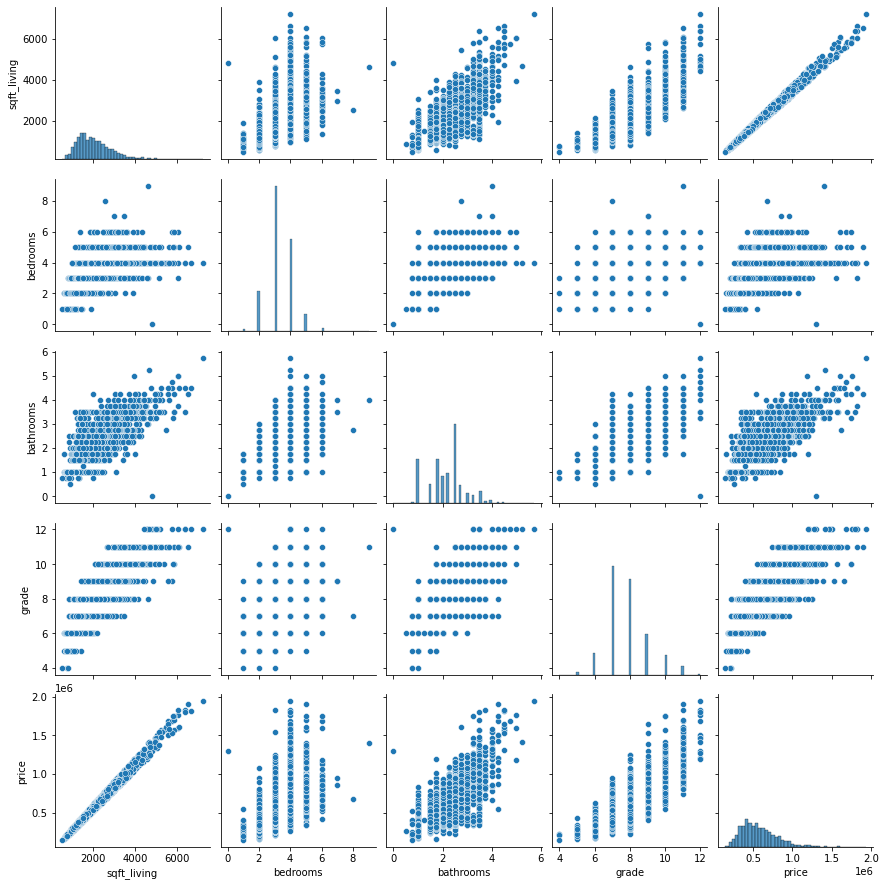

In [66]:
sns.pairplot(data_ext[['sqft_living','bedrooms','bathrooms','grade','price']])

In [133]:
parameters = {'fit_intercept':[True,False],'normalize':[False,True],'positive':[True,False]}

In [138]:
model_reg=LinearRegression()
model_reg_gs=GridSearchCV(model,parameters)
result=model_reg_gs.fit(x_train,y_train)
print(result.best_score_)
print(result.best_params_)

0.6464908226331137
{'fit_intercept': True, 'normalize': False, 'positive': False}


In [181]:
def linear_reg(feat):
    model=LinearRegression(fit_intercept= True, normalize= False, positive= False)
    model.fit(x_train[feat],y_train)
    predicted=model.predict(x_test[feat])
    
    print("MSE", mean_squared_error(y_test,predicted))
    print("R squared", metrics.r2_score(y_test,predicted))
    
    
linear_reg(["sqft_living","grade",'sqft_above','bathrooms','bedrooms','view','lat','long'])

MSE 52658471414.07702
R squared 0.646763535038718


In [190]:
model_reg=LinearRegression()
pipe = Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),('model_reg', LinearRegression())])
                       
param={'poly__degree':range(1,4),'poly__interaction_only':[True,False],'poly__include_bias':[True,False],
      'model_reg__fit_intercept':[True,False],'model_reg__normalize':[False,True],'model_reg__positive':[True,False]}
search = GridSearchCV(estimator=pipe,param_grid=param,scoring='r2')

result=search.fit(x_train,y_train)
print(result.best_score_)
print(result.best_params_)
print(result.cv_results_)


0.745117051078021
{'model_reg__fit_intercept': False, 'model_reg__normalize': False, 'model_reg__positive': False, 'poly__degree': 2, 'poly__include_bias': True, 'poly__interaction_only': False}
{'mean_fit_time': array([0.00677972, 0.00498657, 0.00378985, 0.00378981, 0.01795135,
       0.0271276 , 0.01815157, 0.02771773, 0.10152879, 0.33183308,
       0.0907815 , 0.31426864, 0.00458813, 0.00439715, 0.00498524,
       0.004987  , 0.00917616, 0.0115694 , 0.00917611, 0.01037226,
       0.01855164, 0.03211389, 0.0167552 , 0.03191447, 0.00638299,
       0.00618348, 0.00568533, 0.00519223, 0.01733785, 0.02472444,
       0.01715622, 0.02433453, 0.06462727, 0.25245805, 0.06462903,
       0.25312929, 0.00618339, 0.00558486, 0.00498638, 0.00498686,
       0.01037188, 0.01196756, 0.01017256, 0.01117043, 0.01934862,
       0.03590536, 0.01775355, 0.03290348, 0.00518622, 0.00558524,
       0.00518546, 0.0041894 , 0.0183507 , 0.03151999, 0.01875   ,
       0.0319078 , 0.10386887, 0.35456123, 0.10184

In [214]:
def poly_reg(feat,deg):
    model=LinearRegression(fit_intercept= True, normalize= True, positive= False)
    poly = PolynomialFeatures(degree = deg,include_bias=True,interaction_only=False)
    x_train_fit = poly.fit_transform(x_train[feat])
    model.fit( x_train_fit,y_train)
    x_test_ = poly.fit_transform(x_test[feat])                                       
    predicted=model.predict(x_test_)

    #print("MSE polynomial degree {0} regression of {1} :".format(deg,feat), mean_squared_error(y_test,predicted))
    print("R squared polynomial degree {0} regression of {1} :".format(deg,feat), metrics.r2_score(y_test,predicted))
    
    
    
poly_reg(["sqft_living","grade",'sqft_above','bathrooms','bedrooms','view','lat','long'],2)

R squared polynomial degree 2 regression of ['sqft_living', 'grade', 'sqft_above', 'bathrooms', 'bedrooms', 'view', 'lat', 'long'] : 0.7207128210271356
